# Customer Segmentation for Retail: Improving Targeted Marketing Using Hierarchical Clustering

### Business Problem

Retailers often struggle to understand the diverse needs and behaviors of their customers.

Generic marketing strategies and undifferentiated service offerings lead to lower engagement, missed sales opportunities, and inefficient allocation of resources. 

By segmenting customers based on metrics such as annual income and spending score, retailers can identify distinct customer groups.

This enables personalized marketing, optimized assortments, and strategic prioritization—ultimately driving higher customer satisfaction and increased revenue."



### Import required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Step 1: Load dataset

In [1]:

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 2: Select relevant features (Annual Income & Spending Score are best for visualization)

In [6]:

X = df.iloc[:, [3, 4]].values   # Column 3 = Annual Income, Column 4 = Spending Score
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

### Step 3: Create a Dendrogram to find optimal clusters

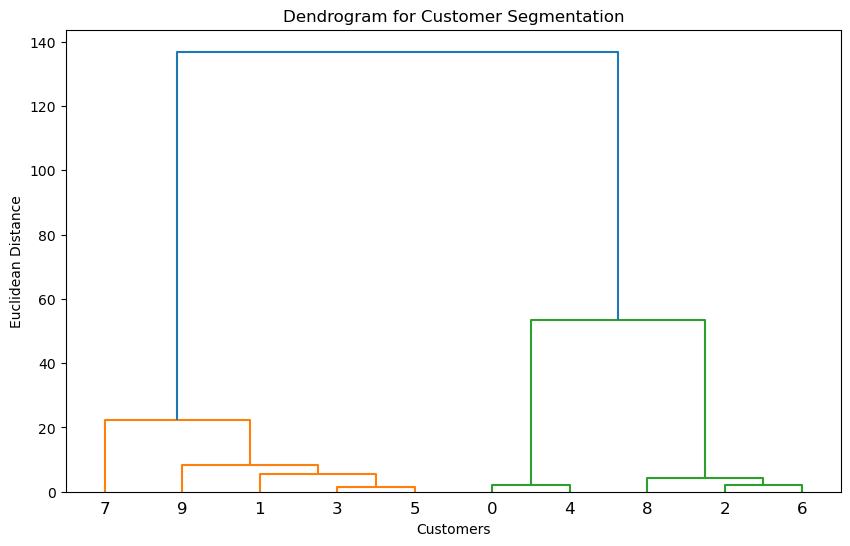

In [25]:

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X[:10], method='ward'))

plt.title("Dendrogram for Customer Segmentation")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# Why Ward? 
# Ward minimizes the variance within each cluster, creating compact and meaningful clusters.



### Step 4: Fit Agglomerative Hierarchical Clustering

In [26]:

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

y_hc = hc.fit_predict(X)
y_hc

C:\Users\askpr\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### Step 5: Visualize the clusters

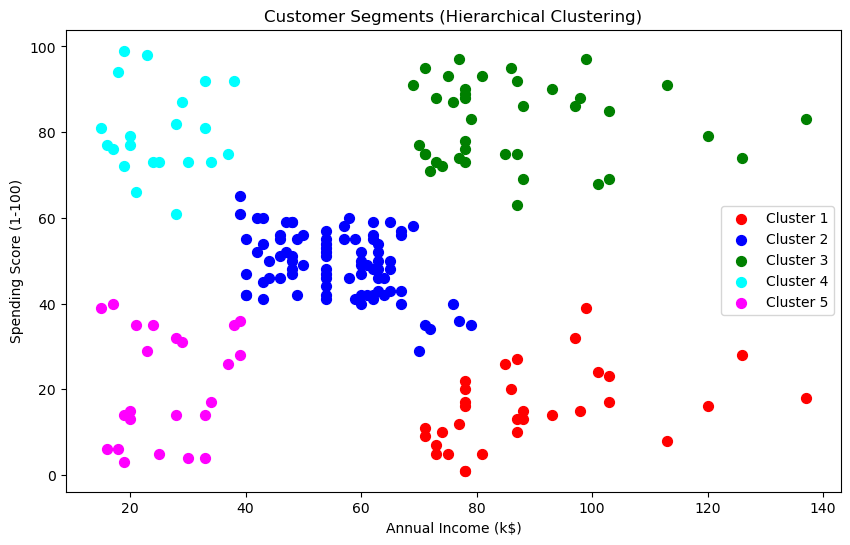

In [11]:

plt.figure(figsize=(10, 6))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, c='red', label='Cluster 1')

plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50, c='blue', label='Cluster 2')

plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=50, c='magenta', label='Cluster 5')

plt.title("Customer Segments (Hierarchical Clustering)")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


### Model evaluation : silhouette_score

In [27]:
from sklearn.metrics import silhouette_score
# Select features for silhouette calculation (without CustomerID or Cluster label)

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Compute silhouette score
score = silhouette_score(X, y_hc)
print("Silhouette Score:", round(score, 3))



Silhouette Score: 0.553


### Observation

We can see clustering is very much upto and clear.

Silhouette Score is 0.55 which is quite acceptable 